In [1]:
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import
from __future__ import unicode_literals

import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

On fait des plots sur les runs

In [2]:
from problem.workflow import print

# Data

In [3]:
from problem.mnist import load_data

In [4]:
X, y = load_data()

# Load models

In [5]:
from problem.mnist import get_save_directory
from problem.mnist import preprocessing
from problem.mnist import skew
from problem.mnist import tangent
from main import get_data_shape

In [6]:
def load_models(get_model, *args, **kwargs):
    models = []
    n_features, n_classes = get_data_shape('mnist')
    for i in range(12):
        model = get_model(*args, n_features=n_features, n_classes=n_classes, **kwargs)
        save_directory = get_save_directory()
        model_name = '{}-{}'.format(model.get_name(), i)
        path = os.path.join(save_directory, model_name)
        model.load(path)
        models.append(model)
    return models

In [7]:
from myNN import get_model as get_model_NN
from myNNDA import get_model as get_model_NNDA
from myTP import get_model as get_model_TP
from myPAN import get_model as get_model_PAN


# Test submission

In [8]:
from problem.mnist import test_submission


In [9]:
def get_mean_std(df_list):
    z = df_list[0]['z']
    acc = np.concatenate([df['accuracy'].values.reshape(-1, 1) for df in df_list], axis=1)
    mean_acc = np.mean(acc, axis=1)
    std_acc = np.std(acc, axis=1)
    return mean_acc, std_acc

In [10]:
# z_list = list(range(-50, 51, 10)) + list(range(-5, 6, 1))
# z_list = sorted(z_list)
z_list = np.linspace(-10, 10, num=20)


In [11]:
PAN_L01_models = load_models(get_model_PAN, preprocessing=preprocessing, skew=skew, trade_off=0.1, width=5.)
df_list = test_submission(PAN_L01_models, X, y, z_list=z_list)
PAN_L01_mean_acc, PAN_L01_std_acc = get_mean_std(df_list)


INFO:tensorflow:Restoring parameters from /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-0.1-5-Adam-SGD-SGD-0/weights.ckpt


InvalidArgumentError: Unsuccessful TensorSliceReader constructor: Failed to get matching files on /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-0.1-5-Adam-SGD-SGD-0/weights.ckpt: Not found: /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-0.1-5-Adam-SGD-SGD-0
	 [[Node: save/RestoreV2_26 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_26/tensor_names, save/RestoreV2_26/shape_and_slices)]]
	 [[Node: save/RestoreV2_32/_57 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_134_save/RestoreV2_32", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'save/RestoreV2_26', defined at:
  File "/home/tao/vestrade/miniconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-5a359f524ec5>", line 1, in <module>
    PAN_L01_models = load_models(get_model_PAN, preprocessing=preprocessing, skew=skew, trade_off=0.1, width=5)
  File "<ipython-input-6-c739b77ed50d>", line 9, in load_models
    model.load(path)
  File "/home/tao/vestrade/workspace/SystML/mnist/models/pan_new.py", line 73, in load
    saver = tf.train.Saver()
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1140, in __init__
    self.build()
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1172, in build
    filename=self._filename)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 688, in build
    restore_sequentially, reshape)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 663, in restore_v2
    dtypes=dtypes, name=name)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/tao/vestrade/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to get matching files on /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-0.1-5-Adam-SGD-SGD-0/weights.ckpt: Not found: /data/titanic_3/users/vestrade/savings/mnist/PAN_AGNO-3x120-3x120-0.001-0.1-5-Adam-SGD-SGD-0
	 [[Node: save/RestoreV2_26 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_26/tensor_names, save/RestoreV2_26/shape_and_slices)]]
	 [[Node: save/RestoreV2_32/_57 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_134_save/RestoreV2_32", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [ ]:
PAN_L1_models = load_models(get_model_PAN, preprocessing=preprocessing, skew=skew, trade_off=1.0, width=5.)
df_list = test_submission(PAN_L1_models, X, y, z_list=z_list)
PAN_L1_mean_acc, PAN_L1_std_acc = get_mean_std(df_list)


In [ ]:
PAN_L10_models = load_models(get_model_PAN, preprocessing=preprocessing, skew=skew, trade_off=10.0, width=5.)
df_list = test_submission(PAN_L10_models, X, y, z_list=z_list)
PAN_L10_mean_acc, PAN_L10_std_acc = get_mean_std(df_list)


In [ ]:
PAN_L100_models = load_models(get_model_PAN, preprocessing=preprocessing, skew=skew, trade_off=100.0, width=5.)
df_list = test_submission(PAN_L100_models, X, y, z_list=z_list)
PAN_L100_mean_acc, PAN_L100_std_acc = get_mean_std(df_list)


# Plot


- What about confusion matrices ???


In [13]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")

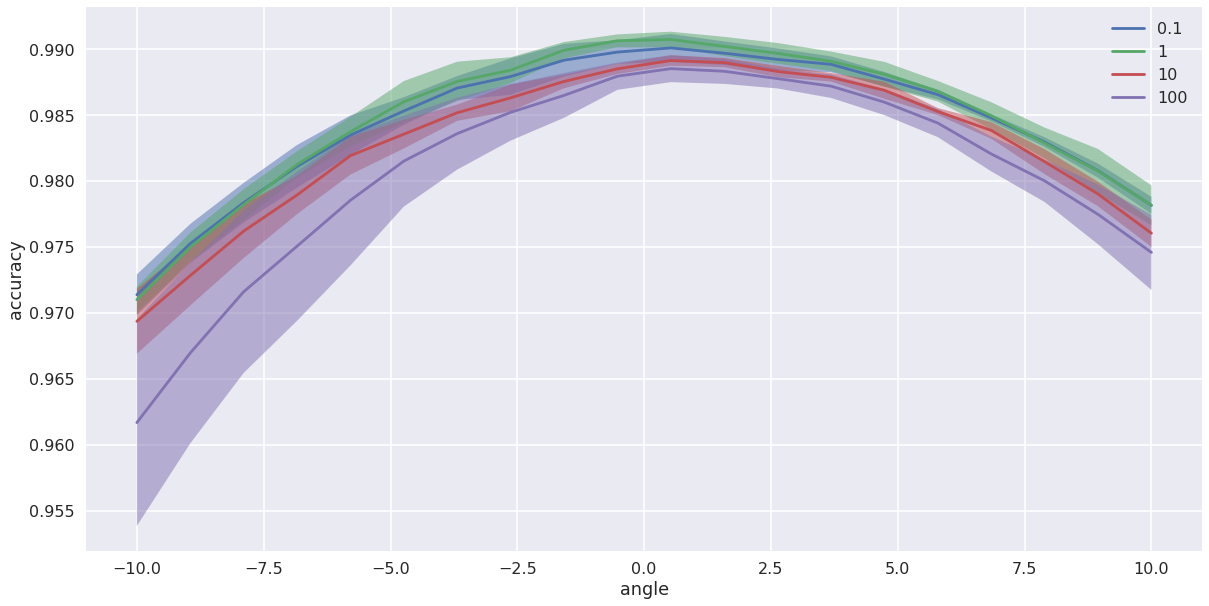

In [22]:
z = z_list

# plt.figure(figsize=(20,10))

plt.plot(z, PAN_L01_mean_acc, label='0.1')
plt.fill_between(z, PAN_L01_mean_acc+PAN_L01_std_acc, PAN_L01_mean_acc-PAN_L01_std_acc, alpha=0.5)

plt.plot(z, PAN_L1_mean_acc, label='1')
plt.fill_between(z, PAN_L1_mean_acc+PAN_L1_std_acc, PAN_L1_mean_acc-PAN_L1_std_acc, alpha=0.5)

plt.plot(z, PAN_L10_mean_acc, label='10')
plt.fill_between(z, PAN_L10_mean_acc+PAN_L10_std_acc, PAN_L10_mean_acc-PAN_L10_std_acc, alpha=0.5)

plt.plot(z, PAN_L100_mean_acc, label='100')
plt.fill_between(z, PAN_L100_mean_acc+PAN_L100_std_acc, PAN_L100_mean_acc-PAN_L100_std_acc, alpha=0.5)


plt.xlabel('angle')
plt.ylabel('accuracy')
plt.legend()
plt.show()


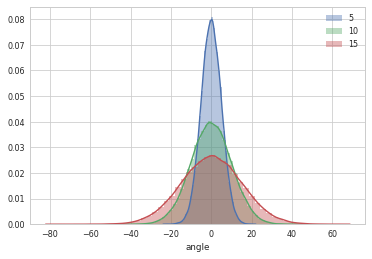

In [15]:
# plt.figure(figsize=(15,8))

zz = np.random.normal( loc=0, scale=5, size=(X.shape[0]) )
sns.distplot(zz, label='5')

zz = np.random.normal( loc=0, scale=10, size=(X.shape[0]) )
sns.distplot(zz, label='10')

zz = np.random.normal( loc=0, scale=15, size=(X.shape[0]) )
sns.distplot(zz, label='15')

plt.xlabel('angle')
plt.legend()
plt.show()

# Playground

In [ ]:
# i = 0
# m = models[i]
# cv_iter = get_cv_iter(X, y)
# idx_dev, idx_valid = cv_iter[i]
# X_test = X[idx_valid]
# y_test = y[idx_valid]
# acc = accuracy_score(y_test, m.predict(X_test))

# print(acc)


In [ ]:
# XX = skew(X_test, z=80)
# y_pred = m.predict(XX)
# acc = accuracy_score(y_test, m.predict(XX))
# print(acc)

# i = np.random.randint(0, XX.shape[0])
# plt.imshow(XX[i].reshape(28,28))

# plt.title('label = {}<->truth = {}'.format(y_pred[i], y_test[i]))
# plt.show()

# plt.imshow(X_test[i].reshape(28,28))
# plt.show()


In [ ]:
# X_test.shape

In [ ]:
# from myNNDA import data_augment

In [ ]:
# XX = X[:200]
# yy = y[:200]
# XX2, yy, _ = data_augment(XX, yy, None)

In [ ]:
# i = 67
# x = XX2[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('skewed')
# plt.show()
# x = XX[i].reshape(28, 28)
# plt.imshow(x, cmap='Greys')
# plt.title('original')
# plt.show()